<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles Dynamic Model II

### Version 1.3

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li>
</ol>
</p>

<p style="text-align:justify;">
In this model, Nernst and fuel cell potential were modeled as a function of water, oxygen and hydrogen gases partial pressure that can be calculated from independent variables or constants. The partial pressure of gases is proportional to the molar flow of each gas. 
</p>

<div style="text-align:center;">
    
<img src="images/Padulles2-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-2 Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles2 import Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [3]:
qO2=qO2_Calc(qH2=0.0004,rho=1.168)
qO2

0.0003424657534246576

In [4]:
PH2=PH2_Calc(KH2=0.0004,tH2=3.37,Kr=Kr,I=1,qH2=0.0004)
PH2

0.22881812879247693

In [5]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

2.0968979878594753

In [6]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=0.0004)
PH2O

2.669532068584946

In [7]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.845819522254369

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [8]:
from opem.Dynamic.Padulles2 import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

3.0480899579320604

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [9]:
from opem.Dynamic.Padulles2 import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

6.096179915864121

In [10]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

6.20382008413588

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [11]:
from opem.Dynamic.Padulles2 import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.3907807638374436

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=100 with `step`=0.1

In [12]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "tH2O": 18.418,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qH2": 0.0004,
    "i-start": 0.1,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "Padulles2_Test"}


* Notice : "Name", new in version 0.5

In [13]:
from opem.Dynamic.Padulles2 import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-II-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 3.0120122442199793 V
FC Efficiency : 0.4265389961269225 
FC Power : 0.33270041697899955 W
FC Voltage : 3.3270041697899955 V
PH2 : 2.169018669476965 atm
PH2O : 2.669687710942903 atm
PO2 : 2.09696938340326 atm
Power-Thermal : 0.2822995830210005 W
###########
I : 0.2
E : 3.012012104448671 V
FC Efficiency : 0.42225504989786394 
FC Power : 0.6587178778406679 W
FC Voltage : 3.293589389203339 V
PH2 : 2.1690046190953503 atm
PH2O : 2.6696704173475743 atm
PO2 : 2.0969614505650616 atm
Power-Thermal : 0.5712821221593323 W
###########
I : 0.3
E : 3.0120119646768333 V
FC Efficiency : 0.4197329719509197 
FC Power : 0.9821751543651522 W
FC Voltage : 3.273917181217174 V
PH2 : 2.1689905687137356 atm
PH2O : 2.669653123752246 atm
PO2 : 2.0969535177268637 atm
Power-Thermal : 0.8628248456348478 W
###########
I : 0.4
E : 3.0120118249044676 V
FC Efficiency : 0.41793223959535725 
FC Power : 1.3039485875375147 W
FC Voltage : 3.2598

FC Power : 57.362147670057226 W
FC Voltage : 3.0190604036872224 V
PH2 : 2.1663631473518454 atm
PH2O : 2.6664192214258082 atm
PO2 : 2.0954700769837804 atm
Power-Thermal : 59.48785232994278 W
###########
I : 19.1
E : 3.0119856781729974 V
FC Efficiency : 0.3869880130878496 
FC Power : 57.65347418982783 W
FC Voltage : 3.0185065020852266 V
PH2 : 2.166349096970231 atm
PH2O : 2.6664019278304796 atm
PO2 : 2.095462144145582 atm
Power-Thermal : 59.811525810172185 W
###########
I : 19.2
E : 3.0119855383011536 V
FC Efficiency : 0.3869171679422311 
FC Power : 57.94471507102853 W
FC Voltage : 3.017953909949403 V
PH2 : 2.1663350465886166 atm
PH2O : 2.6663846342351514 atm
PO2 : 2.0954542113073837 atm
Power-Thermal : 60.13528492897147 W
###########
I : 19.3
E : 3.011985398428779 V
FC Efficiency : 0.38684648893266776 
FC Power : 58.235870443923815 W
FC Voltage : 3.017402613674809 V
PH2 : 2.166320996207002 atm
PH2O : 2.6663673406398227 atm
PO2 : 2.0954462784691854 atm
Power-Thermal : 60.4591295560762 W
#

Power-Thermal : 113.31096112437608 W
###########
I : 35.4
E : 3.011962872068267 V
FC Efficiency : 0.3768742928330619 
FC Power : 104.06252973706506 W
FC Voltage : 2.939619484097883 V
PH2 : 2.1640588847670856 atm
PH2O : 2.6635830717919275 atm
PO2 : 2.094169091519259 atm
Power-Thermal : 113.64747026293495 W
###########
I : 35.5
E : 3.011962732110058 V
FC Efficiency : 0.3768181526765171 
FC Power : 104.3409464761276 W
FC Voltage : 2.9391815908768337 V
PH2 : 2.1640448343854715 atm
PH2O : 2.663565778196599 atm
PO2 : 2.0941611586810605 atm
Power-Thermal : 113.98405352387242 W
###########
I : 35.6
E : 3.0119625921513182 V
FC Efficiency : 0.37676206111647864 
FC Power : 104.6192891308238 W
FC Voltage : 2.9387440767085335 V
PH2 : 2.164030784003857 atm
PH2O : 2.6635484846012702 atm
PO2 : 2.094153225842862 atm
Power-Thermal : 114.32071086917622 W
###########
I : 35.7
E : 3.011962452192049 V
FC Efficiency : 0.3767060178803144 
FC Power : 104.89755773895236 W
FC Voltage : 2.9383069394664525 V
PH2 :

FC Efficiency : 0.3670594228831835 
FC Power : 154.6054289183969 W
FC Voltage : 2.8630634984888315 V
PH2 : 2.1614455137868096 atm
PH2O : 2.6603664630608184 atm
PO2 : 2.092693583614374 atm
Power-Thermal : 177.4945710816031 W
###########
I : 54.1
E : 3.011936690658626 V
FC Efficiency : 0.36700922785617257 
FC Power : 154.87055397074772 W
FC Voltage : 2.862671977278146 V
PH2 : 2.161431463405195 atm
PH2O : 2.6603491694654897 atm
PO2 : 2.0926856507761755 atm
Power-Thermal : 177.8444460292523 W
###########
I : 54.2
E : 3.011936550601204 V
FC Efficiency : 0.36695905375416005 
FC Power : 155.13560956510872 W
FC Voltage : 2.8622806192824486 V
PH2 : 2.161417413023581 atm
PH2O : 2.660331875870161 atm
PO2 : 2.092677717937977 atm
Power-Thermal : 178.19439043489132 W
###########
I : 54.3
E : 3.0119364105432522 V
FC Efficiency : 0.3669089005000032 
FC Power : 155.40059571777135 W
FC Voltage : 2.861889423900025 V
PH2 : 2.161403362641966 atm
PH2O : 2.6603145822748324 atm
PO2 : 2.0926697850997793 atm
Po

###########
I : 69.3
E : 3.0119153958353797 V
FC Efficiency : 0.35958542542873 
FC Power : 194.37030586124575 W
FC Voltage : 2.8047663183440945 V
PH2 : 2.159295805399808 atm
PH2O : 2.657720542975551 atm
PO2 : 2.0914798593700334 atm
Power-Thermal : 231.82469413875427 W
###########
I : 69.4
E : 3.011915255697212 V
FC Efficiency : 0.3595377302197203 
FC Power : 194.62496412253904 W
FC Voltage : 2.8043942957138186 V
PH2 : 2.1592817550181937 atm
PH2O : 2.6577032493802224 atm
PO2 : 2.091471926531835 atm
Power-Thermal : 232.18503587746105 W
###########
I : 69.5
E : 3.0119151155585118 V
FC Efficiency : 0.3594900477263972 
FC Power : 194.87955487247993 W
FC Voltage : 2.8040223722658983 V
PH2 : 2.159267704636579 atm
PH2O : 2.6576859557848937 atm
PO2 : 2.091463993693637 atm
Power-Thermal : 232.54544512752008 W
###########
I : 69.6
E : 3.011914975419281 V
FC Efficiency : 0.3594423779121951 
FC Power : 195.13407812097248 W
FC Voltage : 2.803650547715122 V
PH2 : 2.159253654254965 atm
PH2O : 2.657668

I : 88.5
E : 3.011888479556143 V
FC Efficiency : 0.35062575427232445 
FC Power : 242.03695817418557 W
FC Voltage : 2.7348808833241307 V
PH2 : 2.1565981321298455 atm
PH2O : 2.6544001726724704 atm
PO2 : 2.089956754435959 atm
Power-Thermal : 302.2380418258145 W
###########
I : 88.6
E : 3.011888339315845 V
FC Efficiency : 0.3505799738660842 
FC Power : 242.27880833937346 W
FC Voltage : 2.734523796155457 V
PH2 : 2.156584081748231 atm
PH2O : 2.6543828790771418 atm
PO2 : 2.0899488215977606 atm
Power-Thermal : 302.6111916606265 W
###########
I : 88.7
E : 3.011888199075016 V
FC Efficiency : 0.35053420126155177 
FC Power : 242.5205924848172 W
FC Voltage : 2.7341667698401038 V
PH2 : 2.1565700313666167 atm
PH2O : 2.654365585481813 atm
PO2 : 2.0899408887595623 atm
Power-Thermal : 302.98440751518285 W
###########
I : 88.8
E : 3.011888058833654 V
FC Efficiency : 0.3504884364411454 
FC Power : 242.76231061659496 W
FC Voltage : 2.7338098042409342 V
PH2 : 2.1565559809850026 atm
PH2O : 2.654348291886485 

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [14]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-II-Model Simulation
###########
Analyzing . . .
Done!


In [15]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-II Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [16]:
import sys
!{sys.executable} -m pip -q -q install matplotlib;
import matplotlib.pyplot as plt

In [17]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


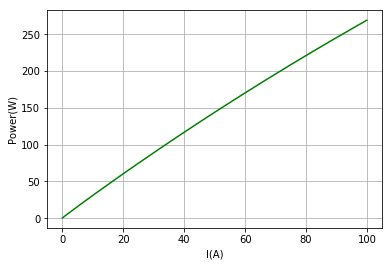

In [18]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

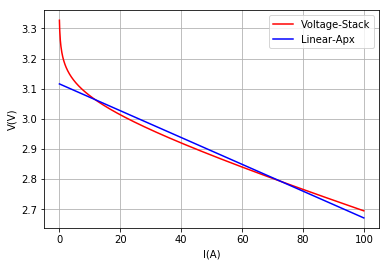

In [19]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

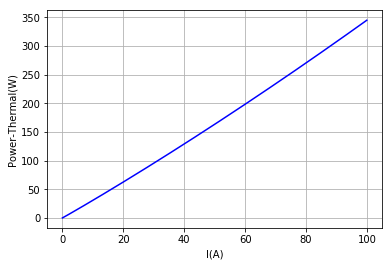

In [20]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

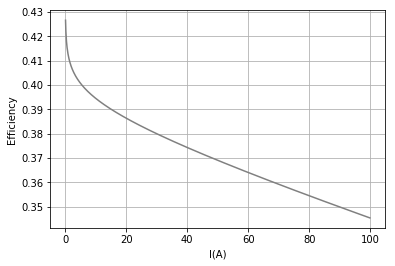

In [21]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

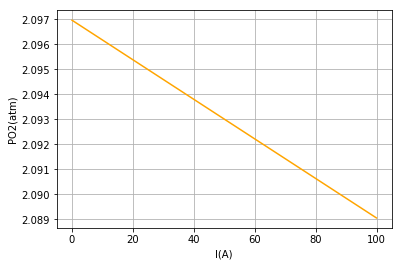

In [22]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

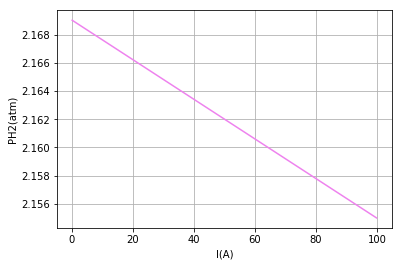

In [23]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

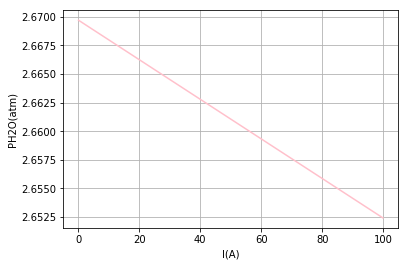

In [24]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-II/Padulles2_Test.html">HTML File</a>

<a href="Padulles-II/Padulles2_Test.opem">OPEM File</a>

<a href="Padulles-II/Padulles2_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Fuel cell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>